In [27]:
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [28]:
startdate =  dt.datetime(2012,1,1)
ticker = '^GSPC' #S&P 500 data
sp500 = yf.Ticker("^GSPC")
df = sp500.history(start=startdate, interval="1d")
df.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,4421200000,0.0,0.0
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,4142280000,0.0,0.0
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,4544570000,0.0,0.0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,4285810000,0.0,0.0
2025-01-17 00:00:00-05:00,5995.399902,6014.959961,5978.439941,5996.660156,4366830000,0.0,0.0


In [29]:
#You need to explicitly set the auto_adjust parameter to false in order to get the 'Adjusted close' column
#Adjusted close is the closing price after adjustments for splits and dividend distributions
df=sp500.history(start=startdate, interval="1d",auto_adjust=False)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2025-01-13 00:00:00-05:00,5782.020020,5838.609863,5773.310059,5836.220215,5836.220215,4421200000,0.0,0.0
2025-01-14 00:00:00-05:00,5859.270020,5871.919922,5805.419922,5842.910156,5842.910156,4142280000,0.0,0.0
2025-01-15 00:00:00-05:00,5905.209961,5960.609863,5905.209961,5949.910156,5949.910156,4544570000,0.0,0.0
2025-01-16 00:00:00-05:00,5963.609863,5964.689941,5930.720215,5937.339844,5937.339844,4285810000,0.0,0.0
2025-01-17 00:00:00-05:00,5995.399902,6014.959961,5978.439941,5996.660156,5996.660156,4366830000,0.0,0.0


In [30]:
df = df.loc[:,['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [31]:
df['simple_ret'] = df.adj_close.pct_change()

[Text(0, 0.5, 'Simple returns (%)')]

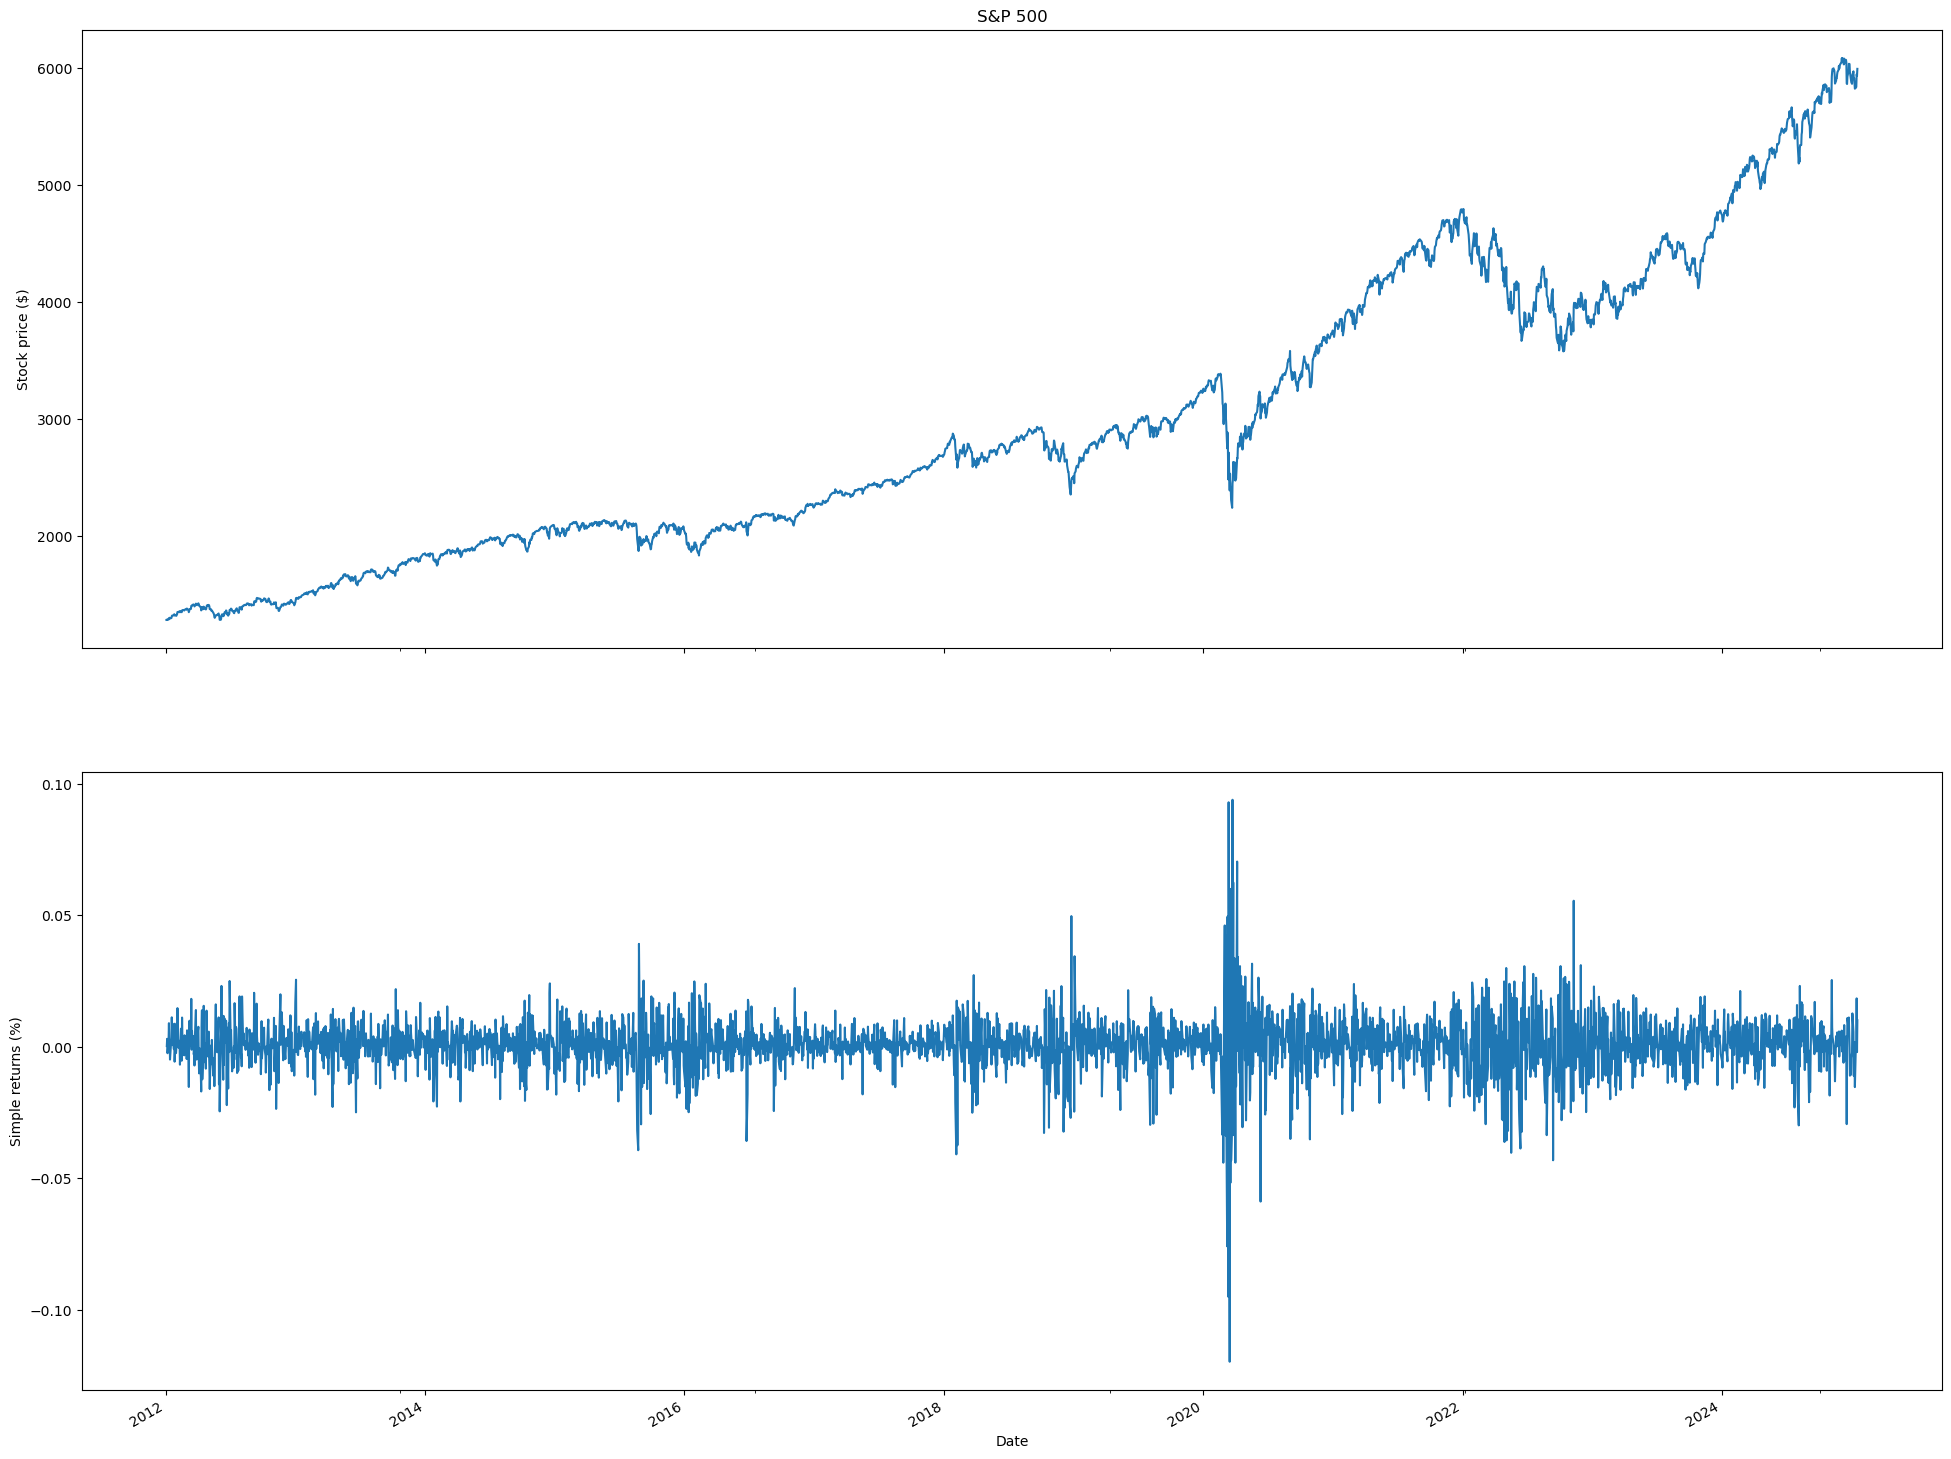

In [34]:
fig,ax = plt.subplots(2,1, figsize=(24,20),sharex=True)
df.adj_close.plot(ax=ax[0])
ax[0].set(title='S&P 500',ylabel='Stock price ($)')

df.simple_ret.plot(ax=ax[1])
ax[1].set(ylabel='Simple returns (%)')